## **Construcción y Evaluación del Modelo**

## Preparación y Análisis de Datos

Esta sección del notebook cubre la configuración y los pasos preliminares para la preparación y análisis de datos. Las siguientes bibliotecas y módulos se importan para apoyar diversas tareas:

- **json**: Para manejar archivos y datos JSON.
- **pandas**: Para la manipulación y análisis de datos.
- **os**: Para interactuar con el sistema operativo, específicamente para la gestión de archivos y directorios.
- **numpy**: Para operaciones numéricas y manipulaciones de arrays.
- **datetime**: Para trabajar con datos de fecha y hora.
- **sys**: Para manipular el entorno de ejecución de Python.
- **chardet**: Para la detección de codificación de caracteres.
- **sweetviz**: Para generar visualizaciones e informes de análisis exploratorio de datos.
- **utilities_meli**: Funciones utilitarias personalizadas específicas para el proyecto.

La variable `module_path` establece la ruta a los scripts de Python del proyecto, asegurando que los módulos personalizados puedan ser importados y utilizados.

In [14]:
import os
import json
import pandas as pd
import os
import numpy as np # type: ignore
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import kds # LIFT PLOT

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

os.getcwd()
os.chdir(path="/Users/juanmanuelpaiba/Documents/Juan_Paiba/new_or_used_algorithm_MELI")

Configuración del entorno para el entrenamiento de modelos y Aprendizaje Automático Automatizado (AutoML) utilizando la biblioteca PyCaret. Aquí tienes un desglose de las bibliotecas y componentes que estás importando:

 * pycaret.datasets: Este módulo de PyCaret te permite acceder fácilmente a conjuntos de datos para tareas de clasificación. La función get_data específicamente recupera un conjunto de datos para tu análisis.

 * pycaret.classification: Este módulo proporciona funciones y clases para tareas de clasificación utilizando PyCaret. * importa todas las funciones/clases de este módulo.

 * ClassificationExperiment: Probablemente sea una clase o función personalizada que has definido para tus experimentos de clasificación. Podría ser una extensión o personalización construida sobre las capacidades de clasificación de PyCaret.

 * imblearn.over_sampling: Esto es de la biblioteca imbalanced-learn, que se utiliza para manejar conjuntos de datos desbalanceados. Específicamente, * aquí importa todas las funciones/clases relacionadas con técnicas de sobremuestreo, que son cruciales para manejar el desbalance de clases en tareas de clasificación.

Esta configuración sugiere que se está preparando el uso de PyCaret para tareas de clasificación, incluidas las capacidades de AutoML.

In [15]:
# Libreriras para modelado y AUTOML
# ==============================================================================
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
#from pycaret.utils import check_metric
from imblearn.over_sampling import *
import os

- Se utiliza la función `pd.read_parquet` para leer el archivo Parquet (`df_modelling.parquet`) que fue generado en un notebook anterior. Este archivo contiene los datos que se procesaron y limpiaron específicamente para el entrenamiento o calificación del modelo.

In [16]:
import pandas as pd

# Read the Parquet files back into DataFrames
df = pd.read_parquet("data/Outputs/df_modelling.parquet")

# Display the first few rows of the loaded DataFrames
print("Loaded Training DataFrame head:")
print(df.shape)
(df.head())

Loaded Training DataFrame head:
(100000, 511)


base_price  price  accepts_mercadopago  automatic_relist  subtitle  \
0          80     80                    1                 0         0   
1        2650   2650                    1                 0         0   
2          60     60                    1                 0         0   
3         580    580                    1                 0         0   
4          30     30                    1                 0         0   

   initial_quantity  sold_quantity  available_quantity  local_pick_up  \
0                 1              0                   1              1   
1                 1              0                   1              1   
2                 1              0                   1              1   
3                 1              0                   1              1   
4                 1              0                   1              1   

   free_shipping  target  month  weekday  mean_base_price_mode  \
0              0       1      9        5                 59757   
1              0       0      9        5                   740   
2              0       0      9        2                   740   
3              0       1      9        0                   740   
4              0       0      8        0                 59757   

   min_base_price_mode  max_base_price_mode  var_base_price_mode  \
0                    1           2222222222      109329072070789   
1                    0               239999              9144042   
2                    0               239999              9144042   
3                    0               239999              9144042   
4                    1           2222222222      109329072070789   

   median_base_price_mode  std_base_price_mode  q1_base_price_mode  \
0                     350             10456054                 100   
1                     199                 3023                  82   
2                     199                 3023                  82   
3                     199                 3023                  82   
4                     350             10456054                 100   

   q3_base_price_mode  mean_initial_quantity_mode  min_initial_quantity_mode  \
0                1500                          27                          1   
1                 508                          41                          1   
2                 508                          41                          1   
3                 508                          41                          1   
4                1500                          27                          1   

   max_initial_quantity_mode  var_initial_quantity_mode  \
0                       9999                     106143   
1                       9999                     231641   
2                       9999                     231641   
3                       9999                     231641   
4                       9999                     106143   

   median_initial_quantity_mode  std_initial_quantity_mode  \
0                             1                        325   
1                             1                        481   
2                             1                        481   
3                             1                        481   
4                             1                        325   

   q1_initial_quantity_mode  q3_initial_quantity_mode  \
0                         1                         1   
1                         1                         3   
2                         1                         3   
3                         1                         3   
4                         1                         1   

   mean_sold_quantity_mode  min_sold_quantity_mode  max_sold_quantity_mode  \
0                        1                       0                    2606   
1                        2                       0                    8676   
2                        2                       0                    8676   
3                        2        

In [17]:
#######################
# Target total data
#######################
df['target'].value_counts(normalize=True)

target
1    0.53758
0    0.46242
Name: proportion, dtype: float64


Este código selecciona columnas numéricas de un DataFrame, calcula la matriz de covarianza, encuentra índices donde la covarianza es cero y muestra los resultados.

In [18]:
# Select only the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the covariance matrix
cova_mtrx = df_numeric.cov()

# Find the indices where covariance is zero
high_cov = np.where(cova_mtrx == 0)

# Filter out the positions where x == y (diagonal elements)
high_cov = [(cova_mtrx.index[x], cova_mtrx.columns[y]) for x, y in zip(*high_cov) if x != y]

# Display the results
print(high_cov)

[('base_price', 'subtitle'), ('base_price', 'min_initial_quantity_mode'), ('base_price', 'min_sold_quantity_mode'), ('base_price', 'median_sold_quantity_mode'), ('base_price', 'q1_sold_quantity_mode'), ('base_price', 'min_sold_quantity_status'), ('base_price', 'median_sold_quantity_status'), ('base_price', 'q1_sold_quantity_status'), ('base_price', 'q3_sold_quantity_status'), ('base_price', 'max_initial_quantity_listing_type_id'), ('base_price', 'min_sold_quantity_listing_type_id'), ('base_price', 'q1_sold_quantity_listing_type_id'), ('base_price', 'min_initial_quantity_state_id'), ('base_price', 'q1_initial_quantity_state_id'), ('base_price', 'min_sold_quantity_state_id'), ('base_price', 'median_sold_quantity_state_id'), ('base_price', 'q1_sold_quantity_state_id'), ('base_price', 'min_initial_quantity_automatic_relist'), ('base_price', 'max_initial_quantity_automatic_relist'), ('base_price', 'min_sold_quantity_automatic_relist'), ('base_price', 'median_sold_quantity_automatic_relist')

Este código calcula la matriz de correlación absoluta para las columnas numéricas de un DataFrame (df_numeric). Luego, identifica pares de variables altamente correlacionadas (con correlación mayor a 0.6) y decide cuál variable de cada par conservar basándose en la diferencia de varianza entre ellas. Si la diferencia de varianza es positiva y mayor a un umbral pequeño (1e-10), se conserva la variable con mayor varianza; de lo contrario, se elimina una de las dos variables. Finalmente, se eliminan las columnas identificadas para ser removidas y se imprime la forma actualizada del DataFrame después de la eliminación.

Este proceso ayuda a reducir la redundancia de información causada por la alta correlación entre variables, lo que puede mejorar la precisión de los modelos de machine learning al reducir el sobreajuste y la multicolinealidad.

In [19]:
# Assuming data_final is your DataFrame and high_corr_var is your list of correlated variables
corr_matrix = df_numeric.corr().abs()
high_corr_var = np.where(corr_matrix > 0.7)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Create a set to store columns to be removed
columns_to_remove = set()

for pair in high_corr_var:
    var_1 = df_numeric[pair[0]].var()
    var_2 = df_numeric[pair[1]].var()

    if not pd.isna(var_1) and not pd.isna(var_2):
        diff_var = var_1 - var_2
        if diff_var > 1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[0], 'varianza:', f'{var_1:.1f}', '| Elimina:', pair[1], 'varianza:', f'{var_2:.1f}')
            columns_to_remove.add(pair[1])
        elif diff_var < -1e-10:  # Adjust the threshold based on your data
            print('Queda', pair[1], 'varianza:', f'{var_2:.1f}', '| Elimina:', pair[0], 'varianza:', f'{var_1:.1f}')
            columns_to_remove.add(pair[0])

# Remove the columns outside the loop
df_numeric.drop(columns=columns_to_remove, inplace=True)

Queda price varianza: 74358322068651.4 | Elimina: base_price varianza: 49385311861387.5
Queda price_square varianza: 274349539869425398250806599221248.0 | Elimina: base_price varianza: 49385311861387.5
Queda base_price varianza: 49385311861387.5 | Elimina: price_bin varianza: 0.0
Queda base_price varianza: 49385311861387.5 | Elimina: price_arcsin varianza: 0.0
Queda price_x_initial_quantity varianza: 19781422898165788.0 | Elimina: base_price varianza: 49385311861387.5
Queda price_square varianza: 274349539869425398250806599221248.0 | Elimina: price varianza: 74358322068651.4
Queda price varianza: 74358322068651.4 | Elimina: price_sqrt varianza: 51465.6
Queda price varianza: 74358322068651.4 | Elimina: price_bin varianza: 0.0
Queda price varianza: 74358322068651.4 | Elimina: price_arcsin varianza: 0.0
Queda price_x_initial_quantity varianza: 19781422898165788.0 | Elimina: price varianza: 74358322068651.4
Queda mean_base_price_accepts_mercadopago varianza: 501794686.6 | Elimina: accepts_

In [20]:
dataset_00 = pd.concat([df.select_dtypes(exclude=[np.number]), df_numeric], axis=1)
print(dataset_00.shape)
dataset_00.head(5)

(100000, 173)


subtitle  target  month  min_initial_quantity_mode  \
0         0       1      9                          1   
1         0       0      9                          1   
2         0       0      9                          1   
3         0       1      9                          1   
4         0       0      8                          1   

   max_initial_quantity_mode  min_sold_quantity_mode  \
0                       9999                       0   
1                       9999                       0   
2                       9999                       0   
3                       9999                       0   
4                       9999                       0   

   median_sold_quantity_mode  q1_sold_quantity_mode  var_base_price_status  \
0                          0                      0             2879725527   
1                          0                      0             2879725527   
2                          0                      0             2879725527   
3                          0                      0             2879725527   
4                          0                      0             2879725527   

   min_initial_quantity_status  max_initial_quantity_status  \
0                            1                         9999   
1                            1                         9999   
2                            1                         9999   
3                            1                         9999   
4                            1                         9999   

   median_initial_quantity_status  q1_initial_quantity_status  \
0                               1                           1   
1                               1                           1   
2                               1                           1   
3                               1                           1   
4                               1                           1   

   min_sold_quantity_status  median_sold_quantity_status  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   q1_sold_quantity_status  q3_sold_quantity_status  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   var_base_price_listing_type_id  q3_base_price_listing_type_id  \
0                  78174286476326                            570   
1                     21082242084                           1999   
2                  78174286476326                            570   
3                     21082242084                           1999   
4                  78174286476326                            570   

   max_initial_quantity_listing_type_id  var_initial_quantity_listing_type_id  \
0                                  9999                                139594   
1                                  9999                                156604   
2                                  9999                                139594   
3                                  9999                                156604   
4                                  9999                                139594   

   min_sold_quantity_listing_type_id  max_sold_quantity_listing_type_id  \
0                                  0                                418   
1                                  0                               8676   
2                                  0                                418   
3                                  0                               8676   
4                                  0                                418   

   var_sold_quantity_listing_type_id  q1_sold

Este código selecciona aleatoriamente el 70% de las filas del DataFrame dataset_00 para formar un conjunto de datos de entrenamiento (data) utilizando el método sample() con frac=0.70 y random_state=2024. Luego, crea un conjunto de datos de validación (data_validacion) con el 30% restante eliminando las filas que están en el conjunto de datos de entrenamiento.

Después de dividir los datos, se reinician los índices para ambos conjuntos de datos para asegurar una indexación consecutiva y se imprime la forma de ambos conjuntos (data y data_validacion) para verificar el tamaño de cada uno.

Este enfoque de división aleatoria es común en el aprendizaje supervisado para separar datos en conjuntos de entrenamiento y validación, asegurando que los modelos se entrenen en una parte de los datos y se evalúen en una parte independiente para verificar su desempeño.

In [21]:
data = dataset_00.sample(frac=0.9, random_state=765)
data_validacion = dataset_00.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_validacion.reset_index(inplace=True, drop=True)
print(data.shape)
print(data_validacion.shape)

(90000, 173)
(10000, 173)


In [22]:
data.head()

subtitle  target  month  min_initial_quantity_mode  \
0         0       0      9                          1   
1         0       1      9                          1   
2         0       0      9                          1   
3         0       1      8                          1   
4         0       0      8                          1   

   max_initial_quantity_mode  min_sold_quantity_mode  \
0                       9999                       0   
1                       9999                       0   
2                       9999                       0   
3                       9999                       0   
4                       9999                       0   

   median_sold_quantity_mode  q1_sold_quantity_mode  var_base_price_status  \
0                          0                      0             2879725527   
1                          0                      0             2879725527   
2                          0                      0             2879725527   
3                          0                      0             2879725527   
4                          0                      0             2879725527   

   min_initial_quantity_status  max_initial_quantity_status  \
0                            1                         9999   
1                            1                         9999   
2                            1                         9999   
3                            1                         9999   
4                            1                         9999   

   median_initial_quantity_status  q1_initial_quantity_status  \
0                               1                           1   
1                               1                           1   
2                               1                           1   
3                               1                           1   
4                               1                           1   

   min_sold_quantity_status  median_sold_quantity_status  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   q1_sold_quantity_status  q3_sold_quantity_status  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   var_base_price_listing_type_id  q3_base_price_listing_type_id  \
0                      1824627272                           1000   
1                  78174286476326                            570   
2                      1824627272                           1000   
3                  78174286476326                            570   
4                      1824627272                           1000   

   max_initial_quantity_listing_type_id  var_initial_quantity_listing_type_id  \
0                                  9999                                  6407   
1                                  9999                                139594   
2                                  9999                                  6407   
3                                  9999                                139594   
4                                  9999                                  6407   

   min_sold_quantity_listing_type_id  max_sold_quantity_listing_type_id  \
0                                  0                                982   
1                                  0                                418   
2                                  0                                982   
3                                  0                                418   
4                                  0                                982   

   var_sold_quantity_listing_type_id  q1_sold

PyCaret es una biblioteca de aprendizaje automático de código abierto diseñada para simplificar el ciclo de vida del desarrollo de modelos. Permite a los científicos de datos realizar experimentos de manera eficiente mediante una interfaz fácil de usar y funciones automatizadas para tareas comunes como la preparación de datos, la selección de características, la validación cruzada y la comparación de modelos.

### [PyCaret](https://pycaret.gitbook.io/docs/get-started/quickstart) ventajas:

- **Facilidad de Uso**: PyCaret reduce la complejidad del código necesario para desarrollar modelos de aprendizaje automático, lo que permite a los usuarios concentrarse más en la investigación y menos en la implementación técnica.

- **Automatización de Tareas**: Automatiza tareas repetitivas como la normalización de datos, la selección de características relevantes y la optimización de hiperparámetros, lo que acelera significativamente el proceso de desarrollo de modelos.

- **Amplia Selección de Modelos**: Ofrece una amplia gama de algoritmos de aprendizaje supervisado y no supervisado para elegir, junto con herramientas para evaluar y comparar su rendimiento de manera intuitiva.

### **Configuración del Experimento y Entrenamiento de metodología ML (Producto nuevo o usado MELI)**

A continuación se muestra la configuración del experimento utilizando PyCaret para un problema de clasificación. Este código establece los parámetros iniciales y prepara el entorno para la construcción y evaluación de modelos de clasificación con datos específicos.


In [23]:
s = ClassificationExperiment()

model_setup = s.setup(
    data=data,
    target='target', 
    session_id=765,
    normalize=True,
    normalize_method='robust',
    feature_selection=True, 
    fix_imbalance=False,
    remove_outliers=True,
    remove_multicollinearity=True, multicollinearity_threshold=0.7,
    fold_strategy='stratifiedkfold', fold_shuffle=True,
  # log_experiment=False,
  # imputation_type='iterative', 
  # ignore_low_variance=True,
  # feature_ratio=True,
  # numeric_features=col_numericas
  # pca=True
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31913, number of negative: 27936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 59849, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.533225 -> initscore=0.133097
[LightGBM] [Info] Start training from score 0.133097


In [24]:
#best = s.compare_models(sort='Accuracy', include = ['lightgbm'])

Este código utiliza la biblioteca PyCaret en Python para comparar varios modelos de aprendizaje automático según sus puntajes de precisión. Aquí tienes un desglose de lo que hace cada parte:

1. Función compare_models(): Esta función en PyCaret te permite comparar el rendimiento de múltiples modelos en un conjunto de datos dado. Toma varios parámetros:

 * sort='Accuracy': Especifica que los modelos deben ordenarse según sus puntajes de precisión. La precisión aquí probablemente se refiere a la precisión de clasificación para tareas de clasificación o posiblemente al error cuadrático medio para tareas de regresión, según el tipo de problema.
include=['rf', 'lightgbm', 'et', 'dt', 'gbc', 'knn', 'ada', 'lr']: Especifica los modelos a incluir en la comparación. Estas abreviaturas corresponden a diferentes algoritmos:
     * 'rf': Bosques Aleatorios (Random Forest)
     * 'lightgbm': LightGBM
     * 'et': Clasificador de Árboles Extra (Extra Trees Classifier)
     * 'dt': Árbol de Decisión (Decision Tree Classifier)
     * 'gbc': Clasificador de Gradiente Boosting (Gradient Boosting Classifier)
     * 'knn': Clasificador de Vecinos Más Cercanos (K-Nearest Neighbors Classifier)
     * 'ada': AdaBoost Classifier
     * 'lr': Regresión Logística (Logistic Regression)

2. best: Esta variable almacena el modelo de mejor rendimiento basado en la comparación. 

In [25]:
# OOP API
best = s.compare_models(sort='Accuracy', include = ['rf','lightgbm','et','dt','gbc','knn','ada','lr'])

Este comando afina el modelo identificado como el mejor por compare_models (best) para optimizar su precisión. s.tune_model(best, optimize='Accuracy') ajusta los hiperparámetros del modelo para mejorar su rendimiento en términos de precisión, buscando la configuración óptima para obtener mejores resultados.

La validación cruzada es una técnica que consiste en dividir los datos en varios subconjuntos (o pliegues). El modelo se entrena en algunos de estos pliegues y se prueba en los pliegues restantes, repitiendo el proceso varias veces. Esto permite evaluar el rendimiento del modelo de manera más robusta y reducir el riesgo de sobreajuste, proporcionando una estimación más precisa de su capacidad predictiva en datos no vistos.

In [26]:
m1_tuneado = s.tune_model(best, optimize='Accuracy')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


El código proporciona la configuración detallada de un modelo LGBMClassifier utilizando la biblioteca LightGBM en Python. El método print() se utiliza para mostrar los parámetros configurados para el modelo LGBMClassifier, que incluyen opciones específicas como boosting_type='gbdt', learning_rate=0.1, n_estimators=100, y otros parámetros relacionados con la construcción de árboles de decisión potenciados por gradientes. Estos parámetros son esenciales para controlar aspectos clave del modelo, como la velocidad de aprendizaje, la profundidad máxima de los árboles, la cantidad de árboles en el ensamblaje, entre otros.

El LGBMClassifier se configura aquí con boosting_type='gbdt', lo que indica que se utiliza Gradient Boosting Decision Tree como el método de aumento. El learning_rate se establece en 0.1, lo que controla la tasa de aprendizaje del modelo, mientras que n_estimators determina el número de árboles que se construirán. Estos parámetros influyen en la capacidad del modelo para ajustarse a los datos de entrenamiento y generalizar a datos no vistos. Además, se especifican otros parámetros como min_child_samples, min_child_weight, y reg_alpha que regulan aspectos específicos del proceso de construcción de árboles para optimizar el rendimiento predictivo del modelo.

In [27]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=765, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [28]:
print(m1_tuneado)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=270, n_jobs=-1, num_leaves=200, objective=None,
               random_state=765, reg_alpha=2, reg_lambda=0.5, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [29]:
# OOP API
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Visualización de algunas métricas y resultados del modelo**

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

El comando s.plot_model(best, plot='auc') genera una gráfica del área bajo la curva (AUC) para el modelo identificado como el mejor (best).

El AUC (Área Bajo la Curva) es una métrica utilizada para evaluar el rendimiento de un modelo de clasificación. Específicamente, se refiere al área bajo la curva ROC (Receiver Operating Characteristic). La curva ROC es una gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de decisión del modelo. El AUC proporciona una única medida que resume el rendimiento del modelo: un AUC de 1.0 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere un rendimiento no mejor que un modelo aleatorio. **Un AUC más cercano a 1.0 indica mejor capacidad del modelo para distinguir entre clases positivas y negativas, algo importantísimo en la optimización de recursos para campañar**

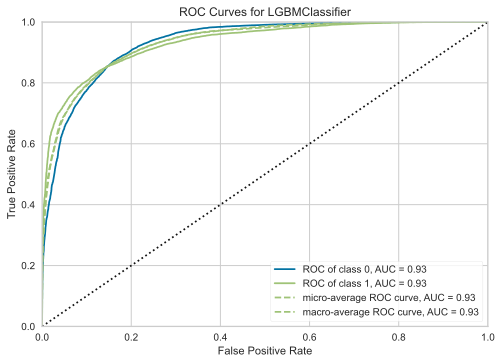

In [31]:
s.plot_model(best, plot='auc')

El comando s.plot_model(best, plot="lift") genera una gráfica de curva de elevación (Lift Curve) para el modelo identificado como el mejor (best).

La curva de elevación (Lift Curve) es una herramienta utilizada para evaluar el rendimiento de un modelo de clasificación en términos de su capacidad para identificar correctamente las instancias positivas. La elevación mide el rendimiento del modelo comparado con un modelo aleatorio.

En la gráfica de elevación, el eje y representa el factor de elevación, mientras que el eje x representa el porcentaje de datos clasificados como positivos. La elevación se calcula dividiendo la tasa de aciertos del modelo por la tasa de aciertos de un modelo aleatorio. Un valor de elevación mayor que 1 indica que el modelo tiene un rendimiento mejor que el azar, con valores más altos indicando un mejor rendimiento.

Esta gráfica es particularmente útil en aplicaciones de marketing y detección de fraudes, donde se desea identificar un pequeño número de casos positivos en un gran conjunto de datos.

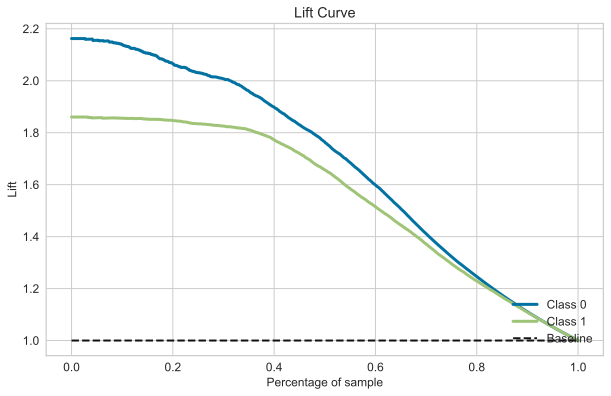

In [32]:
s.plot_model(best, plot="lift")

La gráfica de importancia de características es una visualización que muestra la relevancia de cada característica en la predicción realizada por el modelo. En esta gráfica, cada característica se ordena y se muestra según su impacto en las predicciones del modelo. Las características con una mayor importancia tienen un impacto mayor en el resultado del modelo, mientras que las características con menor importancia tienen un impacto menor.

Este tipo de gráfica es muy útil para interpretar y comprender cómo el modelo toma decisiones, permitiendo identificar las variables que más influyen en las predicciones. Esto puede ayudar a los científicos de datos y analistas a tomar decisiones informadas sobre qué características son críticas y cuáles podrían ser eliminadas o tratadas de manera diferente para mejorar el rendimiento del modelo.

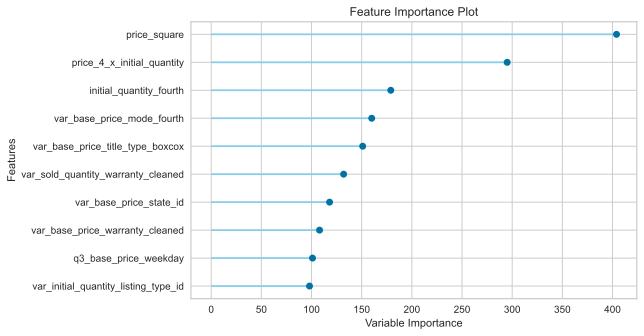

In [33]:
s.plot_model(best, plot="feature")

La matriz de confusión es una herramienta utilizada en la evaluación de modelos de clasificación. Esta gráfica muestra el desempeño del modelo clasificando las observaciones en sus respectivas clases. La matriz se organiza en una cuadrícula donde:

Las filas representan las clases verdaderas (etiquetas reales).
Las columnas representan las clases predichas por el modelo.
Cada celda en la matriz contiene el número de predicciones hechas por el modelo, clasificadas en función de las etiquetas reales y las etiquetas predichas. Los elementos principales (diagonal) representan las instancias correctamente clasificadas, mientras que los elementos fuera de la diagonal representan las instancias incorrectamente clasificadas.

Componentes Clave de la Matriz de Confusión:
 * True Positives (TP): Casos correctamente predichos como positivos.
 * True Negatives (TN): Casos correctamente predichos como negativos.
 * False Positives (FP): Casos predichos como positivos que son realmente negativos.
 * False Negatives (FN): Casos predichos como negativos que son realmente positivos.

Utilidad:
La matriz de confusión es fundamental para calcular diversas métricas de desempeño del modelo, tales como la precisión (accuracy), la precisión (precision), la sensibilidad (recall) y el puntaje F1 (F1-score). Estas métricas ayudan a evaluar y comparar la efectividad de diferentes modelos de clasificación.

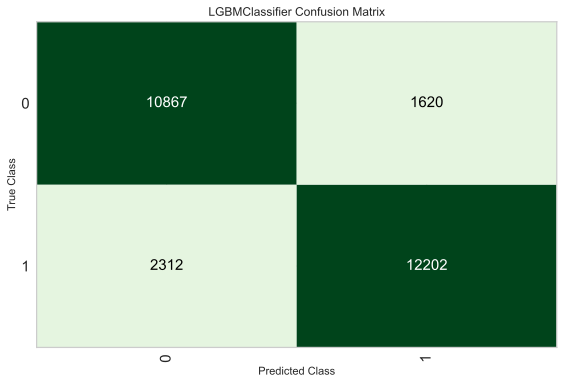

In [34]:
s.plot_model(best, plot="confusion_matrix")

**predicción en las bases de testeo destinadas para este fin, de igual forma se validan resultados y tenemos métricas de prefornmance bastante similares a las obtenidas en los conjuntos de entrenamiento, particularmente en el accuracy.**

In [35]:
a = s.predict_model(best, data=data_validacion, raw_score=True)

In [36]:
a[['target','prediction_score_1']].groupby(a.prediction_label)['prediction_score_1'].agg(['count','min','max'])

count     min     max
prediction_label                       
0                  4842  0.0011  0.4998
1                  5158  0.5000  0.9989

In [37]:
a.shape

(10000, 176)

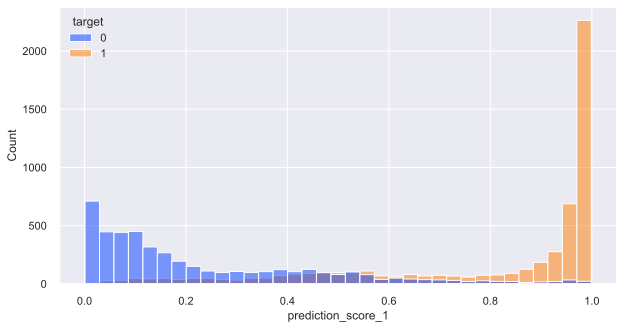

In [38]:

#################### Histograma Prob
sns.set(font_scale=1)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=a, x="prediction_score_1", hue="target", palette='bright', bins=35)
#plt.xlim(0, 0.4)
#plt.ylim(0, 50)
plt.show()

El reporte de Lift normalmente incluye:

Segmentos/Deciles: Los datos se dividen en segmentos, comúnmente deciles, basados en las puntuaciones predichas.
Tasa de Respuesta Observada: La tasa de eventos positivos en cada segmento.
Lift: El ratio entre la tasa de respuesta observada en un segmento y la tasa de respuesta promedio en todo el conjunto de datos.
Gráfico de Lift: Un gráfico que visualiza el Lift en cada segmento, mostrando cómo mejora el modelo en comparación con una selección aleatoria.

ste proceso es crucial para entender la capacidad de tu modelo de clasificación para identificar correctamente los eventos positivos y maximizar su efectividad en aplicaciones prácticas como campañas de marketing.

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

decile  prob_min  prob_max  prob_avg  cnt_cust  cnt_resp  cnt_non_resp  \
0       1     0.992     0.999     0.995    1000.0    1000.0           0.0   
1       2     0.978     0.992     0.986    1000.0     988.0          12.0   
2       3     0.943     0.978     0.963    1000.0     957.0          43.0   
3       4     0.751     0.943     0.872    1000.0     877.0         123.0   
4       5     0.522     0.751     0.621    1000.0     612.0         388.0   
5       6     0.374     0.522     0.447    1000.0     448.0         552.0   
6       7     0.194     0.374     0.279    1000.0     276.0         724.0   
7       8     0.106     0.193     0.144    1000.0     131.0         869.0   
8       9     0.048     0.105     0.078    1000.0      74.0         926.0   
9      10     0.001     0.048     0.021    1000.0      16.0         984.0   

   cnt_resp_rndm  cnt_resp_wiz  resp_rate  cum_cust  cum_resp  cum_resp_wiz  \
0          537.9          1000      100.0    1000.0    1000.0          1000   
1          537.9          1000       98.8    2000.0    1988.0          2000   
2          537.9          1000       95.7    3000.0    2945.0          3000   
3          537.9          1000       87.7    4000.0    3822.0          4000   
4          537.9          1000       61.2    5000.0    4434.0          5000   
5          537.9           379       44.8    6000.0    4882.0          5379   
6          537.9             0       27.6    7000.0    5158.0          5379   
7          537.9             0       13.1    8000.0    5289.0          5379   
8          537.9             0        7.4    9000.0    5363.0          5379   
9          537.9             0        1.6   10000.0    5379.0          5379   

   cum_non_resp  cum_cust_pct  cum_resp_pct  cum_resp_pct_wiz  \
0           0.0          10.0        18.591            18.591   
1          12.0          20.0        36.959            37.182   
2          55.0          30.0        54.750            55.772   
3         178.0          40.0        71.054            74.363   
4         566.0          50.0        82.432            92.954   
5        1118.0          60.0        90.760           100.000   
6        1842.0          70.0        95.891           100.000   
7        2711.0          80.0        98.327           100.000   
8        3637.0          90.0        99.703           100.000   
9        4621.0         100.0       100.000           100.000   

   cum_non_resp_pct      KS   lift  
0             0.000  18.591  1.859  
1             0.260  36.699  1.848  
2             1.190  53.560  1.825  
3             3.852  67.202  1.776  
4            12.248  70.184  1.649  
5            24.194  66.566  1.513  
6            39.862  56.029  1.370  
7            58.667  39.660  1.229  
8            78.706  20.997  1.108  
9           100.000   0.000  1.000

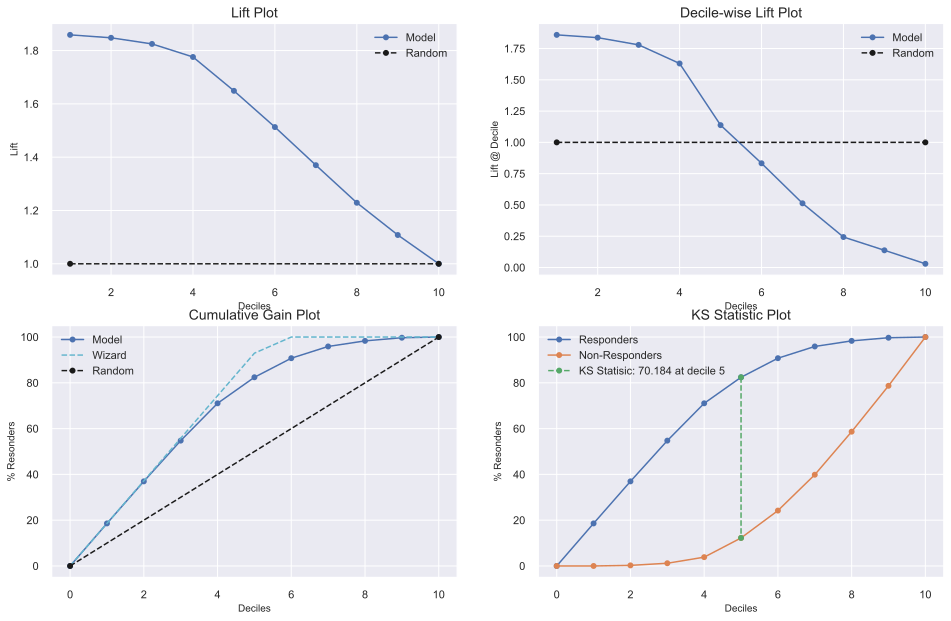

In [39]:
report_lift = kds.metrics.report(a['target'], a['prediction_score_1'])
report_lift

In [42]:
s.save_model(best,f"data/Outputs/Modelos/ML_CLassification_condition_{str(datetime.now().strftime('%Y_%m_%d'))}")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['subtitle', 'month',
                                              'min_initial_quantity_mode',
                                              'max_initial_quantity_mode',
                                              'min_sold_quantity_mode',
                                              'median_sold_quantity_mode',
                                              'q1_sold_quantity_mode',
                                              'var_base_price_status',
                                              'min_initial_quantity_status',
                                              'max_initial_quantity_status',
                                              'median...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',